<a href="https://colab.research.google.com/github/luk450r71z/DO101-apps/blob/master/Mapa_de_los_Poderes_Judiciales_de_la_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data / Carga de datos

In [11]:
!pip install ipython-autotime --quiet
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 12.3 s (started: 2024-05-17 13:05:19 +00:00)


In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gc


time: 646 µs (started: 2024-05-17 16:04:55 +00:00)


In [ ]:
# Descargar el dataset desde la web (descomprimir el .csv)
# https://www.kaggle.com/datasets/lucasemanuelortiz/mapa-tics-en-los-poderes-judiciales-de-argentina

time: 381 µs (started: 2024-05-15 16:01:04 +00:00)


In [209]:
# Load .csv file from FileSystem
# Cargar el .csv obtenido en el paso anterior
from google.colab import files
uploaded = files.upload()

Saving MapaTICS_PJ_Argentina.csv to MapaTICS_PJ_Argentina (3).csv
time: 6.98 s (started: 2024-05-17 16:04:57 +00:00)


In [233]:
# Load dataset into Dataframe
# Cargamos el dataset en un dataframe
df_mapa_pj_arg = pd.read_csv('MapaTICS_PJ_Argentina.csv')

time: 6.87 ms (started: 2024-05-17 16:11:26 +00:00)


In [234]:
df_mapa_pj_arg.head()

,Marca temporal,A que región del País pertenece ?,Cuál es la Jerarquía Institucional del área de Sistemas donde trabaja?,¿ Cuál es el rol o función que desempeña ? (puede marcar varios),Cuál es su nivel de formación académica?,En que rango de edad se ubica?,En que rango de Salario Básico se ubica? (en pesos argentinos),"Cuál es la cantidad total del plantel perteneciente a la Secretaría, Dirección o Área de Sistemas en el que cumple funciones?",Que porcentaje estimado de Desarrollo de Software propio tiene el Poder Judicial? (sobre el total de sistemas),Cuál es el número aproximado de usuarios (internos y externos) a la que la Secretaría / Dirección / Área presta servicios?,Que porcentaje de informatización de procesos administrativos y jurisdiccionales considera que tienen de avance?,Considera suficiente los recursos con que cuenta la Secretaría / Dirección / Área para sostener y cumplir los objetivos propuestos?,Que áreas funcionales que actualmente no existan en su Secretaría o Dirección considera indispensables?
0,6/05/2024 12:59:21,NOA,Secretaría,Secretario/a - Director/a,Postgrado Universitario,35 a 45,$800.000 a $ 900.000,30 a 40,100%,Menos de 2.000,50%,NO,seguridad
1,6/05/2024 13:01:25,Patagonia,Secretaría,Secretario/a - Director/a,Postgrado Universitario,50 - 55,Más de $1.500.000,30 a 40,100%,2.000 a 4.000,NaN,SI,IA
2,6/05/2024 13:02:08,NEA,Secretaría,"Jéfe/ Responsable de Área, Administrador de Ba...",Universitario,45 - 50,$1.300.000 a $ 1.400.000,40 a 50,75%,4.000 a 8.000,NS/NC,SI,NaN
3,6/05/2024 13:03:50,Patagonia,Dirección,"SysAdmin, Project Manager, Analista en Ciberse...",Universitario,50 - 55,$1.400.000 a $ 1.500.000,Menos de 20,75%,Menos de 2.000,75%,NO,NaN
4,6/05/2024 13:07:00,NOA,Dirección,"Secretario/a - Director/a, Jéfe/ Responsable d...",Postgrado Universitario,45 - 50,$800.000 a $ 900.000,Más de 100,75%,8.000 a 10.000,100%,NO,"Coordinación, Control de Calidad, Adquisiciones"


time: 40.9 ms (started: 2024-05-17 16:11:28 +00:00)


In [235]:
#Labels are renamed to make them easier to read.
# cambiamos el nombre de las columnas para facilitar su lectura.
df_mapa_pj_arg.rename(columns={df_mapa_pj_arg.columns[0]: "timestamp",df_mapa_pj_arg.columns[1]:"region",df_mapa_pj_arg.columns[2]:"inst_hierarchy",
                             df_mapa_pj_arg.columns[3]:"role",df_mapa_pj_arg.columns[4]:"academic_degree",df_mapa_pj_arg.columns[5]: "age_range",
                             df_mapa_pj_arg.columns[6]:"salary_range",df_mapa_pj_arg.columns[7]:"total_team", df_mapa_pj_arg.columns[8]: "self_development_perc",
                             df_mapa_pj_arg.columns[9]: "total_users", df_mapa_pj_arg.columns[10]: "auto_judicial_process_perc", df_mapa_pj_arg.columns[11]:"suff_tic_resources",
                             df_mapa_pj_arg.columns[12]:"non_ext_funct_areas" },inplace=True)
df_mapa_pj_arg

,timestamp,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources,non_ext_funct_areas
0,6/05/2024 12:59:21,NOA,Secretaría,Secretario/a - Director/a,Postgrado Universitario,35 a 45,$800.000 a $ 900.000,30 a 40,100%,Menos de 2.000,50%,NO,seguridad
1,6/05/2024 13:01:25,Patagonia,Secretaría,Secretario/a - Director/a,Postgrado Universitario,50 - 55,Más de $1.500.000,30 a 40,100%,2.000 a 4.000,NaN,SI,IA
2,6/05/2024 13:02:08,NEA,Secretaría,"Jéfe/ Responsable de Área, Administrador de Ba...",Universitario,45 - 50,$1.300.000 a $ 1.400.000,40 a 50,75%,4.000 a 8.000,NS/NC,SI,NaN
3,6/05/2024 13:03:50,Patagonia,Dirección,"SysAdmin, Project Manager, Analista en Ciberse...",Universitario,50 - 55,$1.400.000 a $ 1.500.000,Menos de 20,75%,Menos de 2.000,75%,NO,NaN
4,6/05/2024 13:07:00,NOA,Dirección,"Secretario/a - Director/a, Jéfe/ Responsable d...",Postgrado Universitario,45 - 50,$800.000 a $ 900.000,Más de 100,75%,8.000 a 10.000,100%,NO,"Coordinación, Control de Calidad, Adquisiciones"
5,6/05/2024 13:12:29,Patagonia,Dirección,"Administrador de Base de Datos (DBA), Administ...",Universitario,50 - 55,Más de $1.500.000,20 a 30,75%,Menos de 2.000,75%,NO,Considero indispensable un equipo dedicado a S...
6,6/05/2024 13:16:30,Patagonia,Área / Oficina,"Administrador/operador de infraestructura, Adm...",Universitario,35 a 45,$1.400.000 a $ 1.500.000,30 a 40,NS/NC,4.000 a 8.000,75%,SI,NaN
7,6/05/2024 13:24:40,NOA,Área / Oficina,"Coordinador de Áreas, Analista funcional, Oper...",Secundario,45 - 50,$900.000 a $ 1.000.000,Menos de 20,Menos del 30%,2.000 a 4.000,Menos del 50%,NO,"Gerencial, Jefes conscientes"
8,6/05/2024 13:25:06,Cuyo,Dirección,Secretario/a - Director/a,Postgrado Universitario,50 - 55,Más de $1.500.000,40 a 50,50%,2.000 a 4.000,75%,SI,DevOps
9,6/05/2024 13:30:10,Cuyo,Dirección,Coordinador de Áreas,Universitario,55 - 60,Más de $1.500.000,30 a 40,Menos del 30%,2.000 a 4.000,50%,NO,NaN


time: 49.6 ms (started: 2024-05-17 16:11:31 +00:00)



# **About Dataset / Acerca del Dataset**
The data corresponds to a survey conducted with professionals and technicians from the computer science and technology areas of Justice of the different provinces of Argentina.

Los datos corresponden a una encuesta realizada a profesionales y técnicos de las áreas de informática y tecnología de los Poderes Judiciales de las distintas provincias de la Argentina.

***Columns / Columnas***

**timestamp** : Timestamp corresponding to the particular survey response date/time - Fecha y hora correspondiente a la creación de la respuesta de la encuesta particular.

**region**: Statistical regions established by INDEC Argentina - Regiones estadísticas establecidas por el INDEC Argentina.

**inst_hierarchy**: Institutional hierarchy of the IT department or area - Jerarquía Institucional del departamento / área / dirección de tecnología o informática.

**role**: Function or role exercised by the IT professional (separated by middle dash) - Función o rol del profesional IT (Separados por guión).

**academic_degree**: Degree of academic training - Grado de formación académica

**age_range** : Age range to which the professional belongs - Rango de edad a la que el profesional pertenece.

**salary_range** : Salary range that the professional receives -Rango de sueldo que el profesional recibe.

**total_team**  : Total IT team members - Total de miembros del equipo IT.

**self_development_perc** : Total percentage of own software development - Porcentaje total de desarrollo de software propio.

**total_users** : Total number of users of IT services - Cantidad total de usuarios de servicios IT.

**auto_judicial_process_perc** : percentage automation of judicial processes - Porcentaje de automatización de procesos Judiciales.

**suff_tic_resources** : Sufficiency of tic resources - Suficiencia de recursos tics.

**non_ext_funct_areas**: Non-existent functional areas considered necessary - Areas funcionales inexistentes consideradas necesarias.
















# **Data pre-processing and exploratory analysis / Pre procesamiento de datos y analisis exploratorio**

In [191]:
# We analyze the dataset
# Analizamos el dataset

df_mapa_pj_arg.head()

,timestamp,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources,non_ext_funct_areas
0,6/05/2024 12:59:21,NOA,Secretaría,Secretario/a - Director/a,Postgrado Universitario,35 a 45,$800.000 a $ 900.000,30 a 40,100%,Menos de 2.000,50%,NO,seguridad
1,6/05/2024 13:01:25,Patagonia,Secretaría,Secretario/a - Director/a,Postgrado Universitario,50 - 55,Más de $1.500.000,30 a 40,100%,2.000 a 4.000,NaN,SI,IA
2,6/05/2024 13:02:08,NEA,Secretaría,"Jéfe/ Responsable de Área, Administrador de Ba...",Universitario,45 - 50,$1.300.000 a $ 1.400.000,40 a 50,75%,4.000 a 8.000,NS/NC,SI,NaN
3,6/05/2024 13:03:50,Patagonia,Dirección,"SysAdmin, Project Manager, Analista en Ciberse...",Universitario,50 - 55,$1.400.000 a $ 1.500.000,Menos de 20,75%,Menos de 2.000,75%,NO,NaN
4,6/05/2024 13:07:00,NOA,Dirección,"Secretario/a - Director/a, Jéfe/ Responsable d...",Postgrado Universitario,45 - 50,$800.000 a $ 900.000,Más de 100,75%,8.000 a 10.000,100%,NO,"Coordinación, Control de Calidad, Adquisiciones"


time: 43 ms (started: 2024-05-17 15:53:27 +00:00)


In [18]:

df_mapa_pj_arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   timestamp                   53 non-null     object
 1   region                      53 non-null     object
 2   inst_hierarchy              53 non-null     object
 3   role                        53 non-null     object
 4   academic_degree             52 non-null     object
 5   age_range                   53 non-null     object
 6   salary_range                53 non-null     object
 7   total_team                  53 non-null     object
 8   self_development_perc       53 non-null     object
 9   total_users                 53 non-null     object
 10  auto_judicial_process_perc  52 non-null     object
 11  suff_tic_resources          51 non-null     object
 12  non_ext_funct_areas         34 non-null     object
dtypes: object(13)
memory usage: 5.5+ KB
time: 27 ms (sta

In [19]:
# We analyze the null values
# Analizamos los nulos

df_mapa_pj_arg.isnull().sum()

timestamp                      0
region                         0
inst_hierarchy                 0
role                           0
academic_degree                1
age_range                      0
salary_range                   0
total_team                     0
self_development_perc          0
total_users                    0
auto_judicial_process_perc     1
suff_tic_resources             2
non_ext_funct_areas           19
dtype: int64

time: 5.03 ms (started: 2024-05-17 13:07:00 +00:00)


In [20]:
# Replace nulls in the 'academic_degree' column with 'NS/NC'
# Vamos a reemplazar los nulos de la columna 'academic_degree'  por 'NS/NC'

# Revisamos los valores que existen para cada categoría de la feature.
# Count the values for each category
df_mapa_pj_arg['academic_degree'].value_counts()

academic_degree
Universitario              23
Terciario                  10
Postgrado Universitario     9
Maestría                    6
Secundario                  4
Name: count, dtype: int64

time: 7.62 ms (started: 2024-05-17 13:07:05 +00:00)


In [21]:
# We check the records with null value.
# Verificamos los registros con valor nulo.
mascara = df_mapa_pj_arg['academic_degree'].isnull()
df_mapa_pj_arg[mascara]


,timestamp,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources,non_ext_funct_areas
31,6/05/2024 22:30:42,NEA,Dirección,"Desarrollador/Programador, Administrador de Ba...",NaN,25 - 35,$400.000 a $ 500.000,20 a 30,100%,10.000 a 15.000,75%,NaN,"Testing, análisis, diseño, arquitectura de sof..."


time: 15.4 ms (started: 2024-05-17 13:07:14 +00:00)


Text(0.5, 0.98, 'IT Academic Degree')

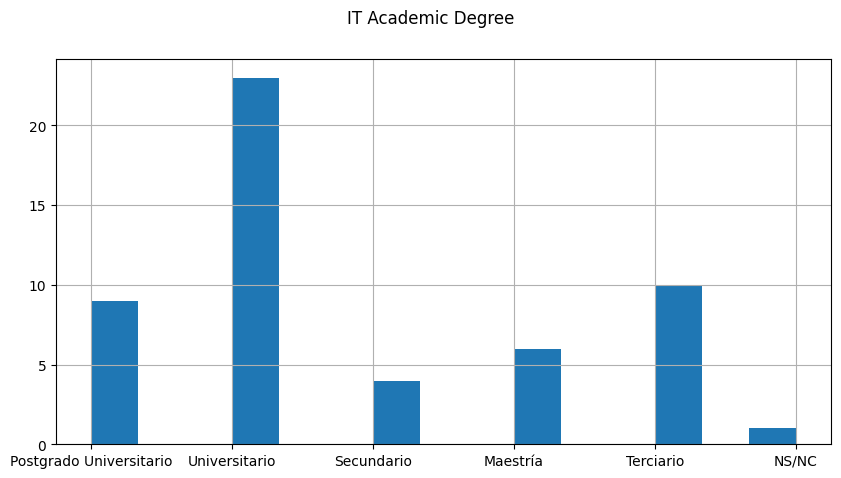

time: 269 ms (started: 2024-05-17 16:11:41 +00:00)


In [236]:
# Replace
# Reemplazamos las filas con nulos por 'NS/NC'
df_mapa_pj_arg.fillna({'academic_degree': 'NS/NC'},inplace=True)
df_mapa_pj_arg['academic_degree'].isnull().sum()

# We plot the histogram.
# Analizamos el histograma de frecuencias
fig, axs = plt.subplots(1,1)
df_mapa_pj_arg['academic_degree'].hist(figsize=(10,5),bins=15)
fig.suptitle("IT Academic Degree")


In [23]:
# Replace nulls in the 'auto_judicial_process_perc' column with 'NS/NC' (No sabe/ No contesta)
# Vamos a reemplazar los nulos de la columna 'auto_judicial_process_perc'  por 'NS/NC' (No sabe/ No contesta)

# Revisamos los valores que existen para cada categoría de la feature.
# Count the values for each category

df_mapa_pj_arg['auto_judicial_process_perc'].value_counts()

auto_judicial_process_perc
75%              30
50%              11
100%              5
NS/NC             4
Menos del 50%     2
Name: count, dtype: int64

time: 4.2 ms (started: 2024-05-17 13:08:27 +00:00)


In [24]:
# Verificamos los registros con valor nulo
# We check the records with null value.
mascara = df_mapa_pj_arg['auto_judicial_process_perc'].isnull()
df_mapa_pj_arg[mascara]

,timestamp,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources,non_ext_funct_areas
1,6/05/2024 13:01:25,Patagonia,Secretaría,Secretario/a - Director/a,Postgrado Universitario,50 - 55,Más de $1.500.000,30 a 40,100%,2.000 a 4.000,NaN,SI,IA


time: 15.4 ms (started: 2024-05-17 13:08:29 +00:00)


Text(0.5, 0.98, 'Percentage Automation of Judicial Processes')

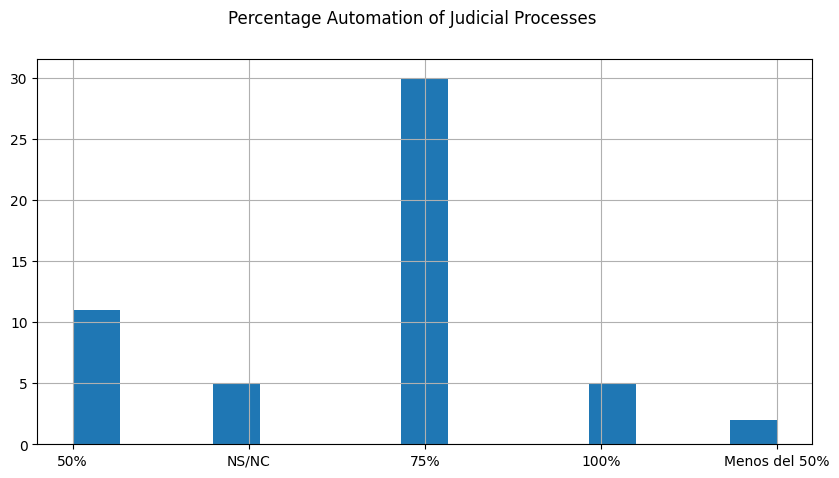

time: 369 ms (started: 2024-05-17 16:11:46 +00:00)


In [237]:
# Replace
# Reemplazamos las filas con nulos por 'NS/NC'
df_mapa_pj_arg.fillna({'auto_judicial_process_perc': 'NS/NC'},inplace=True)
df_mapa_pj_arg['auto_judicial_process_perc'].isnull().sum()

# We plot the histogram.
# Analizamos el histograma de frecuencias
fig, axs = plt.subplots(1,1)
df_mapa_pj_arg['auto_judicial_process_perc'].hist(figsize=(10,5),bins=15)
fig.suptitle("Percentage Automation of Judicial Processes")

In [26]:
# Replace nulls in the 'suff_tic_resources' column with 'NS/NC' (No sabe/ No contesta)
# Vamos a reemplazar los nulos de la columna 'suff_tic_resources'  por 'NS/NC' (No sabe/ No contesta)

# Revisamos los valores que existen para cada categoría de la feature.
# Count the values for each category

df_mapa_pj_arg['suff_tic_resources'].value_counts()

suff_tic_resources
NO                     39
SI                      7
NS/NC                   3
Más personal            1
En algunas áreas no     1
Name: count, dtype: int64

time: 7.58 ms (started: 2024-05-17 13:08:38 +00:00)


In [27]:
# Verificamos los registros con valor nulo
# We check the records with null value.
mascara = df_mapa_pj_arg['suff_tic_resources'].isnull()
df_mapa_pj_arg[mascara]

,timestamp,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources,non_ext_funct_areas
31,6/05/2024 22:30:42,NEA,Dirección,"Desarrollador/Programador, Administrador de Ba...",NS/NC,25 - 35,$400.000 a $ 500.000,20 a 30,100%,10.000 a 15.000,75%,NaN,"Testing, análisis, diseño, arquitectura de sof..."
40,7/05/2024 11:31:40,NOA,Dirección,Analista en Ciberseguridad,Terciario,50 - 55,$500.000 a $ 600.000,NS/NC,NS/NC,4.000 a 8.000,NS/NC,NaN,Comunicación interna


time: 16.8 ms (started: 2024-05-17 13:08:41 +00:00)


Text(0.5, 0.98, 'Sufficiency of tic resources')

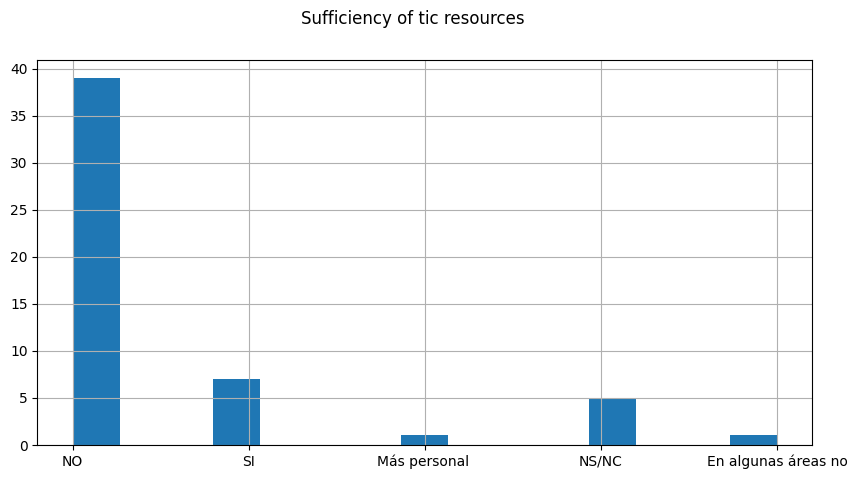

time: 292 ms (started: 2024-05-17 16:11:51 +00:00)


In [238]:
# Replace
# reemplazamos las filas con nulos por 'NS/NC'
df_mapa_pj_arg.fillna({'suff_tic_resources': 'NS/NC'},inplace=True)
df_mapa_pj_arg['suff_tic_resources'].isnull().sum()

# We plot the histogram.
# Analizamos el histograma de frecuencias
fig, axs = plt.subplots(1,1)
df_mapa_pj_arg['suff_tic_resources'].hist(figsize=(10,5),bins=15)
fig.suptitle("Sufficiency of tic resources")

Text(0.5, 0.98, 'Salary Range')

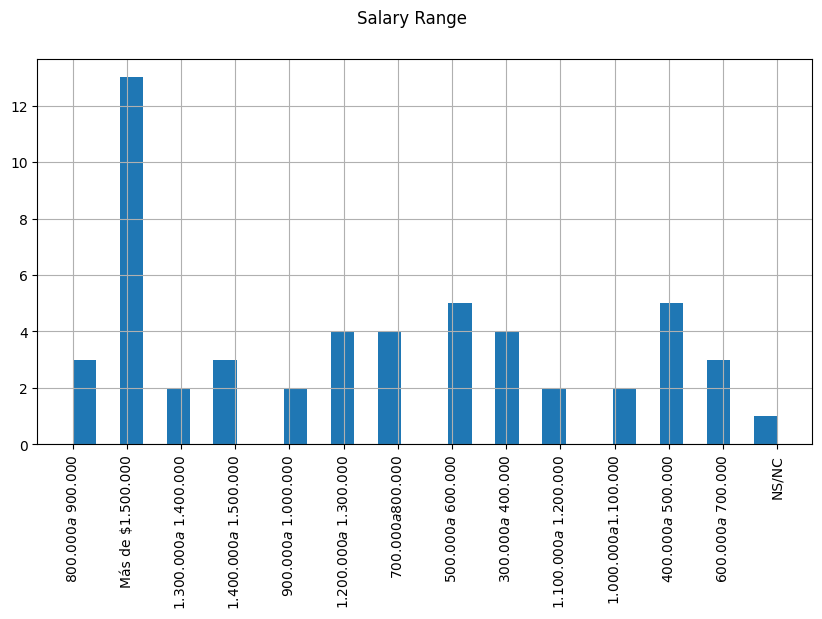

time: 664 ms (started: 2024-05-17 15:56:21 +00:00)


In [195]:
# We plot the histogram range_salary.
# Analizamos el histograma de frecuencias
fig, axs = plt.subplots(1,1)
df_mapa_pj_arg['salary_range'].hist(figsize=(10,5),bins=30)
plt.xticks(rotation=90)
fig.suptitle("Salary Range")

Text(0.5, 0.98, 'Age Range')

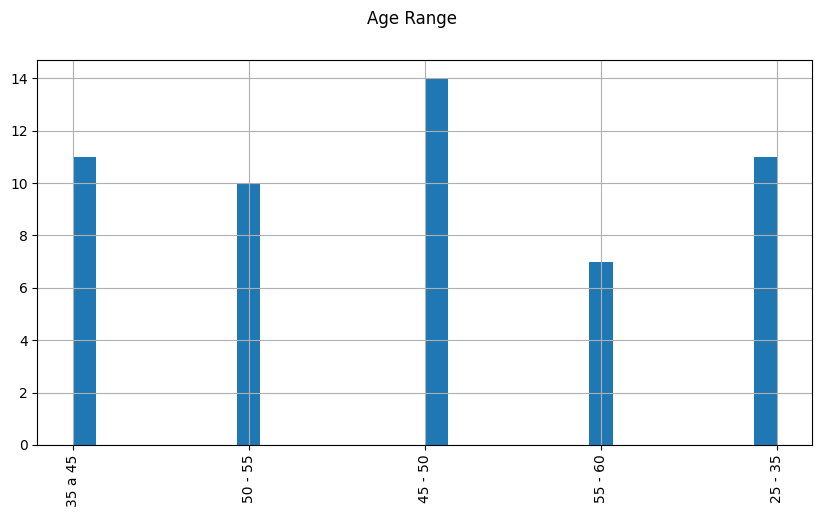

time: 298 ms (started: 2024-05-17 16:00:52 +00:00)


In [196]:
# We plot the histogram range_salary.
# Analizamos el histograma de frecuencias
fig, axs = plt.subplots(1,1)
df_mapa_pj_arg['age_range'].hist(figsize=(10,5),bins=30)
plt.xticks(rotation=90)
fig.suptitle("Age Range")

In [239]:

# Replace nulls in the 'non_ext_funct_areas' column with 'NS/NC' (No sabe/ No contesta)
# Vamos a reemplazar los nulos de la columna 'non_ext_funct_areas'  por 'NS/NC' (No sabe/ No contesta)

# Revisamos los valores que existen para cada categoría de la feature.
# Count the values for each category

df_mapa_pj_arg['non_ext_funct_areas'].value_counts()


non_ext_funct_areas
seguridad                                                                                                                                                                                                                1
Project Manager, DBA, Área de diseño gráfico, testing.                                                                                                                                                                   1
Diagramación  de plataformas                                                                                                                                                                                             1
de ciberseguridad                                                                                                                                                                                                        1
Testing, análisis, diseño, arquitectura de software, administración de bases de datos                   

time: 7.39 ms (started: 2024-05-17 16:12:00 +00:00)


In [240]:
# We check the records with null value.
# Verificamos los registros con valor nulo
df_mapa_pj_arg['non_ext_funct_areas'].isnull().sum()
mascara = df_mapa_pj_arg['non_ext_funct_areas'].isnull()
df_mapa_pj_arg[mascara]

,timestamp,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources,non_ext_funct_areas
2,6/05/2024 13:02:08,NEA,Secretaría,"Jéfe/ Responsable de Área, Administrador de Ba...",Universitario,45 - 50,$1.300.000 a $ 1.400.000,40 a 50,75%,4.000 a 8.000,NS/NC,SI,NaN
3,6/05/2024 13:03:50,Patagonia,Dirección,"SysAdmin, Project Manager, Analista en Ciberse...",Universitario,50 - 55,$1.400.000 a $ 1.500.000,Menos de 20,75%,Menos de 2.000,75%,NO,NaN
6,6/05/2024 13:16:30,Patagonia,Área / Oficina,"Administrador/operador de infraestructura, Adm...",Universitario,35 a 45,$1.400.000 a $ 1.500.000,30 a 40,NS/NC,4.000 a 8.000,75%,SI,NaN
9,6/05/2024 13:30:10,Cuyo,Dirección,Coordinador de Áreas,Universitario,55 - 60,Más de $1.500.000,30 a 40,Menos del 30%,2.000 a 4.000,50%,NO,NaN
13,6/05/2024 13:39:26,NEA,Dirección,Jéfe/ Responsable de Área,Postgrado Universitario,25 - 35,$700.000 a $800.000,Menos de 20,75%,2.000 a 4.000,50%,NO,NaN
15,6/05/2024 13:49:08,Cuyo,Área / Oficina,"Administrador/operador de infraestructura, Adm...",Terciario,25 - 35,$500.000 a $ 600.000,Menos de 20,Menos del 30%,4.000 a 8.000,75%,SI,NaN
16,6/05/2024 13:57:21,NOA,Área / Oficina,"Desarrollador/Programador, Atención al usuario...",Universitario,50 - 55,$1.200.000 a $ 1.300.000,Menos de 20,100%,2.000 a 4.000,50%,NO,NaN
20,6/05/2024 15:15:49,NEA,Dirección,Devops,Terciario,45 - 50,$500.000 a $ 600.000,Menos de 20,100%,NS/NC,75%,NO,NaN
22,6/05/2024 15:43:00,NOA,Dirección,"Secretario/a - Director/a, Jéfe/ Responsable d...",Universitario,35 a 45,$1.400.000 a $ 1.500.000,Más de 100,75%,NS/NC,75%,NO,NaN
27,6/05/2024 19:08:03,Pampeana,Dirección,Secretario/a - Director/a,Maestría,50 - 55,Más de $1.500.000,70 a 80,75%,Más de 20.000,75%,NO,NaN


time: 29.7 ms (started: 2024-05-17 16:12:04 +00:00)


In [241]:
# Replace.
# reemplazamos las filas con nulos por 'NS/NC'
df_mapa_pj_arg.fillna({'non_ext_funct_areas': 'NS/NC'},inplace=True)
df_mapa_pj_arg['non_ext_funct_areas'].isnull().sum()



0

time: 6.16 ms (started: 2024-05-17 16:12:08 +00:00)


In [242]:
# In the roles column, in cases of more than one value, it is replaced by "Multiple Roles".
# En la columna roles, para los casos de mas de un valor, se reemplaza por "Multiples Roles".

roles = []
for row in df_mapa_pj_arg['role']:
  # We use regular expressions to add multiple filters or split characters
  # Usamos expresiones regulares para agregar varios filtros  o caracteres de división
  #tmp = re.split(',', row)
  tmp = re.split(',', row)
  if len(tmp) > 1:
    roles.append("Multiples Roles")
  else:
    roles.append(tmp[0])

df_roles = pd.DataFrame(roles, columns=['role'])


del roles
gc.collect()

# Replace colum role
df_mapa_pj_arg['role'] = df_roles['role']

df_mapa_pj_arg

,timestamp,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources,non_ext_funct_areas
0,6/05/2024 12:59:21,NOA,Secretaría,Secretario/a - Director/a,Postgrado Universitario,35 a 45,$800.000 a $ 900.000,30 a 40,100%,Menos de 2.000,50%,NO,seguridad
1,6/05/2024 13:01:25,Patagonia,Secretaría,Secretario/a - Director/a,Postgrado Universitario,50 - 55,Más de $1.500.000,30 a 40,100%,2.000 a 4.000,NS/NC,SI,IA
2,6/05/2024 13:02:08,NEA,Secretaría,Multiples Roles,Universitario,45 - 50,$1.300.000 a $ 1.400.000,40 a 50,75%,4.000 a 8.000,NS/NC,SI,NS/NC
3,6/05/2024 13:03:50,Patagonia,Dirección,Multiples Roles,Universitario,50 - 55,$1.400.000 a $ 1.500.000,Menos de 20,75%,Menos de 2.000,75%,NO,NS/NC
4,6/05/2024 13:07:00,NOA,Dirección,Multiples Roles,Postgrado Universitario,45 - 50,$800.000 a $ 900.000,Más de 100,75%,8.000 a 10.000,100%,NO,"Coordinación, Control de Calidad, Adquisiciones"
5,6/05/2024 13:12:29,Patagonia,Dirección,Multiples Roles,Universitario,50 - 55,Más de $1.500.000,20 a 30,75%,Menos de 2.000,75%,NO,Considero indispensable un equipo dedicado a S...
6,6/05/2024 13:16:30,Patagonia,Área / Oficina,Multiples Roles,Universitario,35 a 45,$1.400.000 a $ 1.500.000,30 a 40,NS/NC,4.000 a 8.000,75%,SI,NS/NC
7,6/05/2024 13:24:40,NOA,Área / Oficina,Multiples Roles,Secundario,45 - 50,$900.000 a $ 1.000.000,Menos de 20,Menos del 30%,2.000 a 4.000,Menos del 50%,NO,"Gerencial, Jefes conscientes"
8,6/05/2024 13:25:06,Cuyo,Dirección,Secretario/a - Director/a,Postgrado Universitario,50 - 55,Más de $1.500.000,40 a 50,50%,2.000 a 4.000,75%,SI,DevOps
9,6/05/2024 13:30:10,Cuyo,Dirección,Coordinador de Áreas,Universitario,55 - 60,Más de $1.500.000,30 a 40,Menos del 30%,2.000 a 4.000,50%,NO,NS/NC


time: 548 ms (started: 2024-05-17 16:12:11 +00:00)


In [243]:

# We will use regular expression for filter
import re

# We will create a separate dataset for non_ext_funct_areas and extract it from the original dataset for wordcloud analysis.
# Armaremos un dataset aparte de non_ext_funct_areas y lo extraeremos del dataset original para un analisis de palabras.



non_ext_funct_areas = []
for row in df_mapa_pj_arg['non_ext_funct_areas']:
  # We use regular expressions to add multiple filters or split characters
  # Usamos expresiones regulares para agregar varios filtros  o caracteres de división
  #tmp = re.split(',', row)
  tmp = re.split(',|-| / ', row)

  [non_ext_funct_areas.append(i.strip()) for i in tmp]
  #[non_ext_funct_areas.append(i.strip().capitalize()) for i in tmp if i.capitalize() not in list(non_ext_funct_areas)]


df_non_ext_funct_areas = pd.DataFrame(non_ext_funct_areas, columns=['non_ext_funct_areas'])
del non_ext_funct_areas
gc.collect()


# INIT (Code Disabled - It is solved above ) /  (Codido deshabilitado - Se soluciona en el codigo de arriba)
# Eliminamos los registros duplicados
# Delete duplicate entry

#mascara = df_non_ext_funct_areas.duplicated()
#df_non_ext_funct_areas[mascara]
#df_non_ext_funct_areas[mascara].value_counts()
#non_ext_funct_areas

# END (Code Disabled - It is solved above ) /  (Codido deshabilitado - Se soluciona en el codigo de arriba)  //////

#INIT (Code Disabled)
#df_non_ext_funct_areas.drop(7,inplace=True)
#df_non_ext_funct_areas.query('non_ext_funct_areas.str.contains("test")')
# END (Code Disabled)

df_non_ext_funct_areas


,non_ext_funct_areas
0,seguridad
1,IA
2,NS/NC
3,NS/NC
4,Coordinación
...,...
91,Área de sistemas e infraestructuras
92,Área de desarrollo y nuevas tecnologías
93,Atención al Usuario
94,Infraestructura


time: 255 ms (started: 2024-05-17 16:12:22 +00:00)


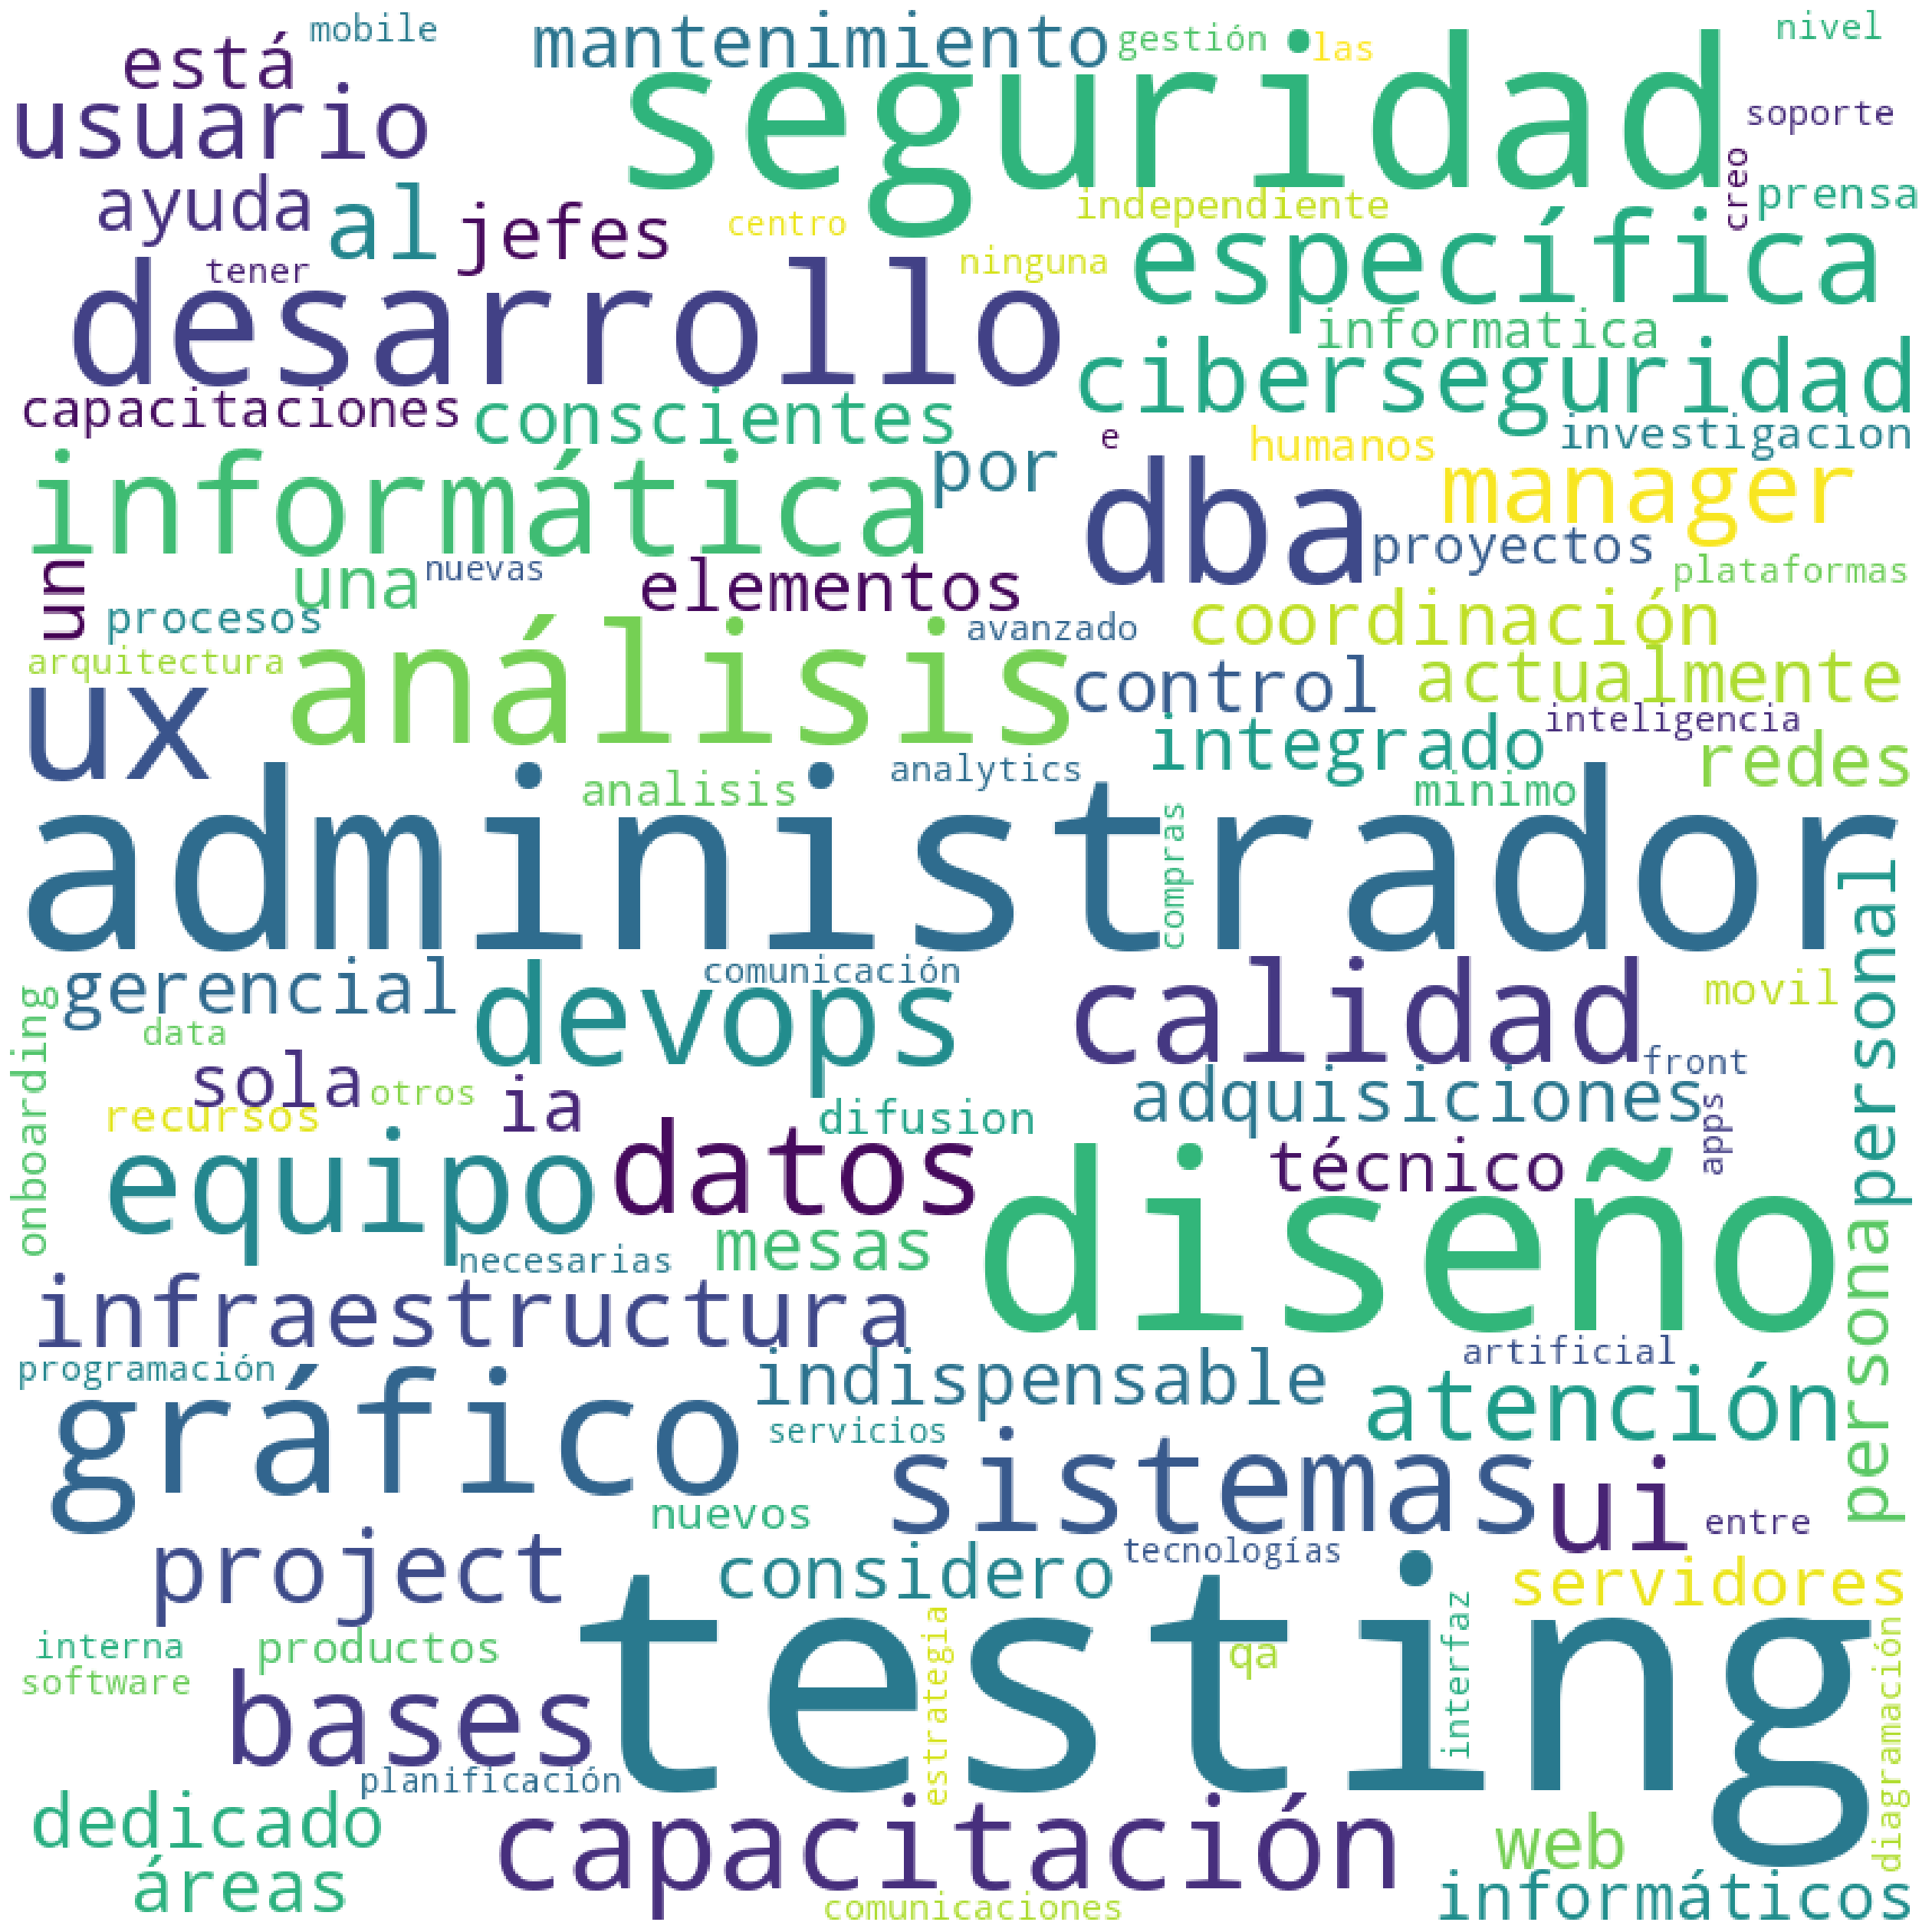

time: 2.47 s (started: 2024-05-17 16:01:24 +00:00)


In [202]:
from wordcloud import WordCloud, STOPWORDS
# Reads 'Youtube04-Eminem.csv' file

comment_words = ''
STOPWORDS.add("de")
STOPWORDS.add("area")
STOPWORDS.add("área")
STOPWORDS.add("administración")
STOPWORDS.add("y")
STOPWORDS.add("ns")
STOPWORDS.add("nc")
STOPWORDS.add("como")
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_non_ext_funct_areas.non_ext_funct_areas:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (25, 25), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**We code the ordinal and nominal categorical columns / codificamos las columnas categoricas ordinales y nominales**




In [244]:
# delete non_ext_funct_areas colum from dataset
# eliminamos la columna non_ext_funct_areas del dataset
df_mapa_pj_arg.drop(columns=['non_ext_funct_areas','timestamp'],inplace=True)
df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,Postgrado Universitario,35 a 45,$800.000 a $ 900.000,30 a 40,100%,Menos de 2.000,50%,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,Postgrado Universitario,50 - 55,Más de $1.500.000,30 a 40,100%,2.000 a 4.000,NS/NC,SI
2,NEA,Secretaría,Multiples Roles,Universitario,45 - 50,$1.300.000 a $ 1.400.000,40 a 50,75%,4.000 a 8.000,NS/NC,SI
3,Patagonia,Dirección,Multiples Roles,Universitario,50 - 55,$1.400.000 a $ 1.500.000,Menos de 20,75%,Menos de 2.000,75%,NO
4,NOA,Dirección,Multiples Roles,Postgrado Universitario,45 - 50,$800.000 a $ 900.000,Más de 100,75%,8.000 a 10.000,100%,NO
5,Patagonia,Dirección,Multiples Roles,Universitario,50 - 55,Más de $1.500.000,20 a 30,75%,Menos de 2.000,75%,NO
6,Patagonia,Área / Oficina,Multiples Roles,Universitario,35 a 45,$1.400.000 a $ 1.500.000,30 a 40,NS/NC,4.000 a 8.000,75%,SI
7,NOA,Área / Oficina,Multiples Roles,Secundario,45 - 50,$900.000 a $ 1.000.000,Menos de 20,Menos del 30%,2.000 a 4.000,Menos del 50%,NO
8,Cuyo,Dirección,Secretario/a - Director/a,Postgrado Universitario,50 - 55,Más de $1.500.000,40 a 50,50%,2.000 a 4.000,75%,SI
9,Cuyo,Dirección,Coordinador de Áreas,Universitario,55 - 60,Más de $1.500.000,30 a 40,Menos del 30%,2.000 a 4.000,50%,NO


time: 51.9 ms (started: 2024-05-17 16:12:29 +00:00)


In [245]:
# We code the categorical variables
# Codificamos las variables categoricas
# salary_range
df_mapa_pj_arg['salary_range'].value_counts()

salary_range
Más de $1.500.000           13
$500.000 a $ 600.000         5
$400.000 a $ 500.000         5
$1.200.000 a $ 1.300.000     4
$700.000 a $800.000          4
$300.000 a $ 400.000         4
$800.000 a $ 900.000         3
$1.400.000 a $ 1.500.000     3
$600.000 a $ 700.000         3
$1.300.000 a $ 1.400.000     2
$900.000 a $ 1.000.000       2
$1.100.000 a $ 1.200.000     2
$1.000.000 a $1.100.000      2
NS/NC                        1
Name: count, dtype: int64

time: 8.34 ms (started: 2024-05-17 16:12:33 +00:00)


In [ ]:
#df_mapa_pj_arg.drop(df_mapa_pj_arg[df_mapa_pj_arg['salary_range'] == "NS/NC"].index, inplace = True)


In [246]:
from sklearn.preprocessing import OrdinalEncoder

encoderSalaryRange = OrdinalEncoder(categories=[["NS/NC","$300.000 a $ 400.000","$400.000 a $ 500.000", "$500.000 a $ 600.000",
                                      "$600.000 a $ 700.000", "$700.000 a $800.000",
                                      "$800.000 a $ 900.000", "$900.000 a $ 1.000.000",
                                      "$1.000.000 a $1.100.000", "$1.100.000 a $ 1.200.000",
                                      "$1.200.000 a $ 1.300.000", "$1.300.000 a $ 1.400.000",
                                      "$1.400.000 a $ 1.500.000",
                                      "Más de $1.500.000"]])

df_mapa_pj_arg['salary_range'] = encoderSalaryRange.fit_transform(df_mapa_pj_arg[['salary_range']])


df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,Postgrado Universitario,35 a 45,6.0,30 a 40,100%,Menos de 2.000,50%,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,Postgrado Universitario,50 - 55,13.0,30 a 40,100%,2.000 a 4.000,NS/NC,SI
2,NEA,Secretaría,Multiples Roles,Universitario,45 - 50,11.0,40 a 50,75%,4.000 a 8.000,NS/NC,SI
3,Patagonia,Dirección,Multiples Roles,Universitario,50 - 55,12.0,Menos de 20,75%,Menos de 2.000,75%,NO
4,NOA,Dirección,Multiples Roles,Postgrado Universitario,45 - 50,6.0,Más de 100,75%,8.000 a 10.000,100%,NO
5,Patagonia,Dirección,Multiples Roles,Universitario,50 - 55,13.0,20 a 30,75%,Menos de 2.000,75%,NO
6,Patagonia,Área / Oficina,Multiples Roles,Universitario,35 a 45,12.0,30 a 40,NS/NC,4.000 a 8.000,75%,SI
7,NOA,Área / Oficina,Multiples Roles,Secundario,45 - 50,7.0,Menos de 20,Menos del 30%,2.000 a 4.000,Menos del 50%,NO
8,Cuyo,Dirección,Secretario/a - Director/a,Postgrado Universitario,50 - 55,13.0,40 a 50,50%,2.000 a 4.000,75%,SI
9,Cuyo,Dirección,Coordinador de Áreas,Universitario,55 - 60,13.0,30 a 40,Menos del 30%,2.000 a 4.000,50%,NO


time: 75.8 ms (started: 2024-05-17 16:12:35 +00:00)


In [ ]:
# academic_degree
df_mapa_pj_arg['academic_degree'].value_counts()


academic_degree
Universitario              23
Terciario                  10
Postgrado Universitario     9
Maestría                    6
Secundario                  4
NS/NC                       1
Name: count, dtype: int64

time: 6.83 ms (started: 2024-05-16 14:58:28 +00:00)


In [ ]:
#df_mapa_pj_arg.drop(df_mapa_pj_arg[df_mapa_pj_arg['academic_degree'] == "NS/NC"].index, inplace = True)

In [247]:
encoderAcademicDegree = OrdinalEncoder(categories=[["NS/NC","Secundario","Terciario", "Universitario",
                                      "Postgrado Universitario", "Maestría",
                                      "Doctorado"]])

df_mapa_pj_arg['academic_degree'] = encoderAcademicDegree.fit_transform(df_mapa_pj_arg[['academic_degree']])


df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,4.0,35 a 45,6.0,30 a 40,100%,Menos de 2.000,50%,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,4.0,50 - 55,13.0,30 a 40,100%,2.000 a 4.000,NS/NC,SI
2,NEA,Secretaría,Multiples Roles,3.0,45 - 50,11.0,40 a 50,75%,4.000 a 8.000,NS/NC,SI
3,Patagonia,Dirección,Multiples Roles,3.0,50 - 55,12.0,Menos de 20,75%,Menos de 2.000,75%,NO
4,NOA,Dirección,Multiples Roles,4.0,45 - 50,6.0,Más de 100,75%,8.000 a 10.000,100%,NO
5,Patagonia,Dirección,Multiples Roles,3.0,50 - 55,13.0,20 a 30,75%,Menos de 2.000,75%,NO
6,Patagonia,Área / Oficina,Multiples Roles,3.0,35 a 45,12.0,30 a 40,NS/NC,4.000 a 8.000,75%,SI
7,NOA,Área / Oficina,Multiples Roles,1.0,45 - 50,7.0,Menos de 20,Menos del 30%,2.000 a 4.000,Menos del 50%,NO
8,Cuyo,Dirección,Secretario/a - Director/a,4.0,50 - 55,13.0,40 a 50,50%,2.000 a 4.000,75%,SI
9,Cuyo,Dirección,Coordinador de Áreas,3.0,55 - 60,13.0,30 a 40,Menos del 30%,2.000 a 4.000,50%,NO


time: 55 ms (started: 2024-05-17 16:12:39 +00:00)


In [ ]:
# total_team
df_mapa_pj_arg['total_team'].value_counts()


total_team
Menos de 20    18
30 a 40        11
20 a 30         8
40 a 50         7
Más de 100      5
70 a 80         1
60 a 70         1
90 a 100        1
NS/NC           1
Name: count, dtype: int64

time: 8.3 ms (started: 2024-05-16 14:58:51 +00:00)


In [ ]:
#df_mapa_pj_arg.drop(df_mapa_pj_arg[df_mapa_pj_arg['total_team'] == "NS/NC"].index, inplace = True)

In [248]:
encoderTotalTeam = OrdinalEncoder(categories=[["NS/NC","Menos de 20","20 a 30","30 a 40", "40 a 50",
                                      "60 a 70", "70 a 80",
                                      "80 a 90","90 a 100","Más de 100"]])

df_mapa_pj_arg['total_team'] = encoderTotalTeam.fit_transform(df_mapa_pj_arg[['total_team']])


df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,4.0,35 a 45,6.0,3.0,100%,Menos de 2.000,50%,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,4.0,50 - 55,13.0,3.0,100%,2.000 a 4.000,NS/NC,SI
2,NEA,Secretaría,Multiples Roles,3.0,45 - 50,11.0,4.0,75%,4.000 a 8.000,NS/NC,SI
3,Patagonia,Dirección,Multiples Roles,3.0,50 - 55,12.0,1.0,75%,Menos de 2.000,75%,NO
4,NOA,Dirección,Multiples Roles,4.0,45 - 50,6.0,9.0,75%,8.000 a 10.000,100%,NO
5,Patagonia,Dirección,Multiples Roles,3.0,50 - 55,13.0,2.0,75%,Menos de 2.000,75%,NO
6,Patagonia,Área / Oficina,Multiples Roles,3.0,35 a 45,12.0,3.0,NS/NC,4.000 a 8.000,75%,SI
7,NOA,Área / Oficina,Multiples Roles,1.0,45 - 50,7.0,1.0,Menos del 30%,2.000 a 4.000,Menos del 50%,NO
8,Cuyo,Dirección,Secretario/a - Director/a,4.0,50 - 55,13.0,4.0,50%,2.000 a 4.000,75%,SI
9,Cuyo,Dirección,Coordinador de Áreas,3.0,55 - 60,13.0,3.0,Menos del 30%,2.000 a 4.000,50%,NO


time: 60.9 ms (started: 2024-05-17 16:12:44 +00:00)


In [ ]:
# age_range
df_mapa_pj_arg['age_range'].value_counts()


age_range
45 - 50    14
35 a 45    11
25 - 35    11
50 - 55    10
55 - 60     7
Name: count, dtype: int64

time: 9.98 ms (started: 2024-05-16 14:59:03 +00:00)


In [249]:
encoderAgeRange = OrdinalEncoder(categories=[["18 - 25","25 - 35","35 a 45", "45 - 50",
                                      "50 - 55", "55 - 60",
                                      "60 - 65"]])

df_mapa_pj_arg['age_range'] = encoderAgeRange.fit_transform(df_mapa_pj_arg[['age_range']])


df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,4.0,2.0,6.0,3.0,100%,Menos de 2.000,50%,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,4.0,4.0,13.0,3.0,100%,2.000 a 4.000,NS/NC,SI
2,NEA,Secretaría,Multiples Roles,3.0,3.0,11.0,4.0,75%,4.000 a 8.000,NS/NC,SI
3,Patagonia,Dirección,Multiples Roles,3.0,4.0,12.0,1.0,75%,Menos de 2.000,75%,NO
4,NOA,Dirección,Multiples Roles,4.0,3.0,6.0,9.0,75%,8.000 a 10.000,100%,NO
5,Patagonia,Dirección,Multiples Roles,3.0,4.0,13.0,2.0,75%,Menos de 2.000,75%,NO
6,Patagonia,Área / Oficina,Multiples Roles,3.0,2.0,12.0,3.0,NS/NC,4.000 a 8.000,75%,SI
7,NOA,Área / Oficina,Multiples Roles,1.0,3.0,7.0,1.0,Menos del 30%,2.000 a 4.000,Menos del 50%,NO
8,Cuyo,Dirección,Secretario/a - Director/a,4.0,4.0,13.0,4.0,50%,2.000 a 4.000,75%,SI
9,Cuyo,Dirección,Coordinador de Áreas,3.0,5.0,13.0,3.0,Menos del 30%,2.000 a 4.000,50%,NO


time: 57.4 ms (started: 2024-05-17 16:12:49 +00:00)


In [52]:
# self_development_perc
df_mapa_pj_arg['self_development_perc'].value_counts()

self_development_perc
75%              23
100%             13
Menos del 30%     6
NS/NC             4
50%               4
30 %              3
Name: count, dtype: int64

time: 7.29 ms (started: 2024-05-17 13:40:06 +00:00)


In [53]:
#df_mapa_pj_arg.drop(df_mapa_pj_arg[df_mapa_pj_arg['self_development_perc'] == "NS/NC"].index, inplace = True)

time: 369 µs (started: 2024-05-17 13:40:09 +00:00)


In [250]:
encoderSelfDevelopmentPerc = OrdinalEncoder(categories=[["NS/NC","Sin Desarrollo propio","Menos del 30%","30 %", "50%",
                                      "75%", "100%"]])

df_mapa_pj_arg['self_development_perc'] = encoderSelfDevelopmentPerc.fit_transform(df_mapa_pj_arg[['self_development_perc']])


df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,4.0,2.0,6.0,3.0,6.0,Menos de 2.000,50%,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,4.0,4.0,13.0,3.0,6.0,2.000 a 4.000,NS/NC,SI
2,NEA,Secretaría,Multiples Roles,3.0,3.0,11.0,4.0,5.0,4.000 a 8.000,NS/NC,SI
3,Patagonia,Dirección,Multiples Roles,3.0,4.0,12.0,1.0,5.0,Menos de 2.000,75%,NO
4,NOA,Dirección,Multiples Roles,4.0,3.0,6.0,9.0,5.0,8.000 a 10.000,100%,NO
5,Patagonia,Dirección,Multiples Roles,3.0,4.0,13.0,2.0,5.0,Menos de 2.000,75%,NO
6,Patagonia,Área / Oficina,Multiples Roles,3.0,2.0,12.0,3.0,0.0,4.000 a 8.000,75%,SI
7,NOA,Área / Oficina,Multiples Roles,1.0,3.0,7.0,1.0,2.0,2.000 a 4.000,Menos del 50%,NO
8,Cuyo,Dirección,Secretario/a - Director/a,4.0,4.0,13.0,4.0,4.0,2.000 a 4.000,75%,SI
9,Cuyo,Dirección,Coordinador de Áreas,3.0,5.0,13.0,3.0,2.0,2.000 a 4.000,50%,NO


time: 60.4 ms (started: 2024-05-17 16:12:57 +00:00)


In [ ]:
# auto_judicial_process_perc
df_mapa_pj_arg['auto_judicial_process_perc'].value_counts()

auto_judicial_process_perc
75%              30
50%              11
NS/NC             5
100%              5
Menos del 50%     2
Name: count, dtype: int64

time: 6.63 ms (started: 2024-05-16 14:59:22 +00:00)


In [ ]:
#df_mapa_pj_arg.drop(df_mapa_pj_arg[df_mapa_pj_arg['auto_judicial_process_perc'] == "NS/NC"].index, inplace = True)

time: 3.06 ms (started: 2024-05-16 10:33:48 +00:00)


In [251]:
encoderAutoJudicialProcessPerc = OrdinalEncoder(categories=[["NS/NC","Menos del 50%","50%","75%", "100%"]])

df_mapa_pj_arg['auto_judicial_process_perc'] = encoderAutoJudicialProcessPerc.fit_transform(df_mapa_pj_arg[['auto_judicial_process_perc']])


df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,4.0,2.0,6.0,3.0,6.0,Menos de 2.000,2.0,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,4.0,4.0,13.0,3.0,6.0,2.000 a 4.000,0.0,SI
2,NEA,Secretaría,Multiples Roles,3.0,3.0,11.0,4.0,5.0,4.000 a 8.000,0.0,SI
3,Patagonia,Dirección,Multiples Roles,3.0,4.0,12.0,1.0,5.0,Menos de 2.000,3.0,NO
4,NOA,Dirección,Multiples Roles,4.0,3.0,6.0,9.0,5.0,8.000 a 10.000,4.0,NO
5,Patagonia,Dirección,Multiples Roles,3.0,4.0,13.0,2.0,5.0,Menos de 2.000,3.0,NO
6,Patagonia,Área / Oficina,Multiples Roles,3.0,2.0,12.0,3.0,0.0,4.000 a 8.000,3.0,SI
7,NOA,Área / Oficina,Multiples Roles,1.0,3.0,7.0,1.0,2.0,2.000 a 4.000,1.0,NO
8,Cuyo,Dirección,Secretario/a - Director/a,4.0,4.0,13.0,4.0,4.0,2.000 a 4.000,3.0,SI
9,Cuyo,Dirección,Coordinador de Áreas,3.0,5.0,13.0,3.0,2.0,2.000 a 4.000,2.0,NO


time: 60.8 ms (started: 2024-05-17 16:13:03 +00:00)


In [ ]:
# total_users
df_mapa_pj_arg['total_users'].value_counts()

total_users
2.000 a 4.000      21
4.000 a 8.000      13
Menos de 2.000      6
8.000 a 10.000      5
NS/NC               3
Más de 20.000       3
10.000 a 15.000     2
Name: count, dtype: int64

time: 11.6 ms (started: 2024-05-16 14:59:33 +00:00)


In [ ]:
#df_mapa_pj_arg.drop(df_mapa_pj_arg[df_mapa_pj_arg['total_users'] == "NS/NC"].index, inplace = True)

time: 6.19 ms (started: 2024-05-16 11:43:45 +00:00)


In [252]:
encoderTotalUsers = OrdinalEncoder(categories=[["NS/NC","Menos de 2.000","2.000 a 4.000", "4.000 a 8.000",
                                      "8.000 a 10.000","10.000 a 15.000","15.000 a 20.000",
                                      "Más de 20.000"]])

df_mapa_pj_arg['total_users'] = encoderTotalUsers.fit_transform(df_mapa_pj_arg[['total_users']])


df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,4.0,2.0,6.0,3.0,6.0,1.0,2.0,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,4.0,4.0,13.0,3.0,6.0,2.0,0.0,SI
2,NEA,Secretaría,Multiples Roles,3.0,3.0,11.0,4.0,5.0,3.0,0.0,SI
3,Patagonia,Dirección,Multiples Roles,3.0,4.0,12.0,1.0,5.0,1.0,3.0,NO
4,NOA,Dirección,Multiples Roles,4.0,3.0,6.0,9.0,5.0,4.0,4.0,NO
5,Patagonia,Dirección,Multiples Roles,3.0,4.0,13.0,2.0,5.0,1.0,3.0,NO
6,Patagonia,Área / Oficina,Multiples Roles,3.0,2.0,12.0,3.0,0.0,3.0,3.0,SI
7,NOA,Área / Oficina,Multiples Roles,1.0,3.0,7.0,1.0,2.0,2.0,1.0,NO
8,Cuyo,Dirección,Secretario/a - Director/a,4.0,4.0,13.0,4.0,4.0,2.0,3.0,SI
9,Cuyo,Dirección,Coordinador de Áreas,3.0,5.0,13.0,3.0,2.0,2.0,2.0,NO


time: 62.5 ms (started: 2024-05-17 16:13:07 +00:00)


In [253]:
categorical_columns = df_mapa_pj_arg.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['region', 'inst_hierarchy', 'role', 'suff_tic_resources']

time: 5.74 ms (started: 2024-05-17 16:13:12 +00:00)


In [ ]:
df_mapa_pj_arg['region'].value_counts()
#df_mapa_pj_arg['role'].value_counts()
#df_mapa_pj_arg['inst_hierarchy'].value_counts()
#df_mapa_pj_arg['suff_tic_resources'].value_counts()



region
NOA                  15
NEA                  15
Cuyo                 12
Patagonia             7
NS/NC                 2
Gran Buenos Aires     1
Pampeana              1
Name: count, dtype: int64

time: 28.7 ms (started: 2024-05-16 15:00:17 +00:00)


In [254]:
df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,4.0,2.0,6.0,3.0,6.0,1.0,2.0,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,4.0,4.0,13.0,3.0,6.0,2.0,0.0,SI
2,NEA,Secretaría,Multiples Roles,3.0,3.0,11.0,4.0,5.0,3.0,0.0,SI
3,Patagonia,Dirección,Multiples Roles,3.0,4.0,12.0,1.0,5.0,1.0,3.0,NO
4,NOA,Dirección,Multiples Roles,4.0,3.0,6.0,9.0,5.0,4.0,4.0,NO
5,Patagonia,Dirección,Multiples Roles,3.0,4.0,13.0,2.0,5.0,1.0,3.0,NO
6,Patagonia,Área / Oficina,Multiples Roles,3.0,2.0,12.0,3.0,0.0,3.0,3.0,SI
7,NOA,Área / Oficina,Multiples Roles,1.0,3.0,7.0,1.0,2.0,2.0,1.0,NO
8,Cuyo,Dirección,Secretario/a - Director/a,4.0,4.0,13.0,4.0,4.0,2.0,3.0,SI
9,Cuyo,Dirección,Coordinador de Áreas,3.0,5.0,13.0,3.0,2.0,2.0,2.0,NO


time: 58.5 ms (started: 2024-05-17 16:13:16 +00:00)


In [224]:
df_mapa_pj_arg.query('inst_hierarchy.str.contains("Project")', engine='python')

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
11,NOA,Of Sup Profesional pero sin tarea asignada. Ha...,Administrador/operador de redes y telecomunica...,4.0,2.0,10.0,2.0,2.0,2.0,2.0,NO


time: 37.9 ms (started: 2024-05-17 16:08:27 +00:00)


In [256]:
# replace
df_mapa_pj_arg.loc[11,'inst_hierarchy'] = 'Dirección'


time: 988 µs (started: 2024-05-17 16:13:36 +00:00)


In [259]:
df_mapa_pj_arg.query('suff_tic_resources.str.contains("Más|algunas")', engine='python')

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources


time: 24.4 ms (started: 2024-05-17 16:13:45 +00:00)


In [261]:
df_mapa_pj_arg.loc[[10,47],'suff_tic_resources'] = 'NO'

time: 2.15 ms (started: 2024-05-17 16:13:54 +00:00)


In [262]:
df_mapa_pj_arg.loc[[10,47]]

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
10,Cuyo,Área / Oficina,Jéfe/ Responsable de Área,3.0,5.0,13.0,4.0,5.0,3.0,3.0,NO
47,Patagonia,Secretaría,Multiples Roles,5.0,5.0,13.0,3.0,6.0,1.0,3.0,NO


time: 31.2 ms (started: 2024-05-17 16:13:56 +00:00)


In [65]:
df_mapa_pj_arg

,region,inst_hierarchy,role,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,suff_tic_resources
0,NOA,Secretaría,Secretario/a - Director/a,4.0,2.0,6.0,3.0,6.0,1.0,2.0,NO
1,Patagonia,Secretaría,Secretario/a - Director/a,4.0,4.0,13.0,3.0,6.0,2.0,0.0,SI
2,NEA,Secretaría,Multiples Roles,3.0,3.0,11.0,4.0,5.0,3.0,0.0,SI
3,Patagonia,Dirección,Multiples Roles,3.0,4.0,12.0,1.0,5.0,1.0,3.0,NO
4,NOA,Dirección,Multiples Roles,4.0,3.0,6.0,9.0,5.0,4.0,4.0,NO
5,Patagonia,Dirección,Multiples Roles,3.0,4.0,13.0,2.0,5.0,1.0,3.0,NO
6,Patagonia,Área / Oficina,Multiples Roles,3.0,2.0,12.0,3.0,0.0,3.0,3.0,SI
7,NOA,Área / Oficina,Multiples Roles,1.0,3.0,7.0,1.0,2.0,2.0,1.0,NO
8,Cuyo,Dirección,Secretario/a - Director/a,4.0,4.0,13.0,4.0,4.0,2.0,3.0,SI
9,Cuyo,Dirección,Coordinador de Áreas,3.0,5.0,13.0,3.0,2.0,2.0,2.0,NO


time: 108 ms (started: 2024-05-17 13:53:55 +00:00)


In [263]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_mapa_pj_arg[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_mapa_pj_arg, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

df_encoded


,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,region_Cuyo,region_Gran Buenos Aires,region_NEA,...,role_Devops,role_Ingeniero en Ciberseguridad,role_Jéfe/ Responsable de Área,role_Multiples Roles,role_Secretario/a - Director/a,role_Soporte Técnico,role_UX/UI Designer,suff_tic_resources_NO,suff_tic_resources_NS/NC,suff_tic_resources_SI
0,4.0,2.0,6.0,3.0,6.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,4.0,4.0,13.0,3.0,6.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,3.0,11.0,4.0,5.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,4.0,12.0,1.0,5.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.0,3.0,6.0,9.0,5.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,3.0,4.0,13.0,2.0,5.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,3.0,2.0,12.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,3.0,7.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,4.0,4.0,13.0,4.0,4.0,2.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,3.0,5.0,13.0,3.0,2.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


time: 104 ms (started: 2024-05-17 16:14:01 +00:00)


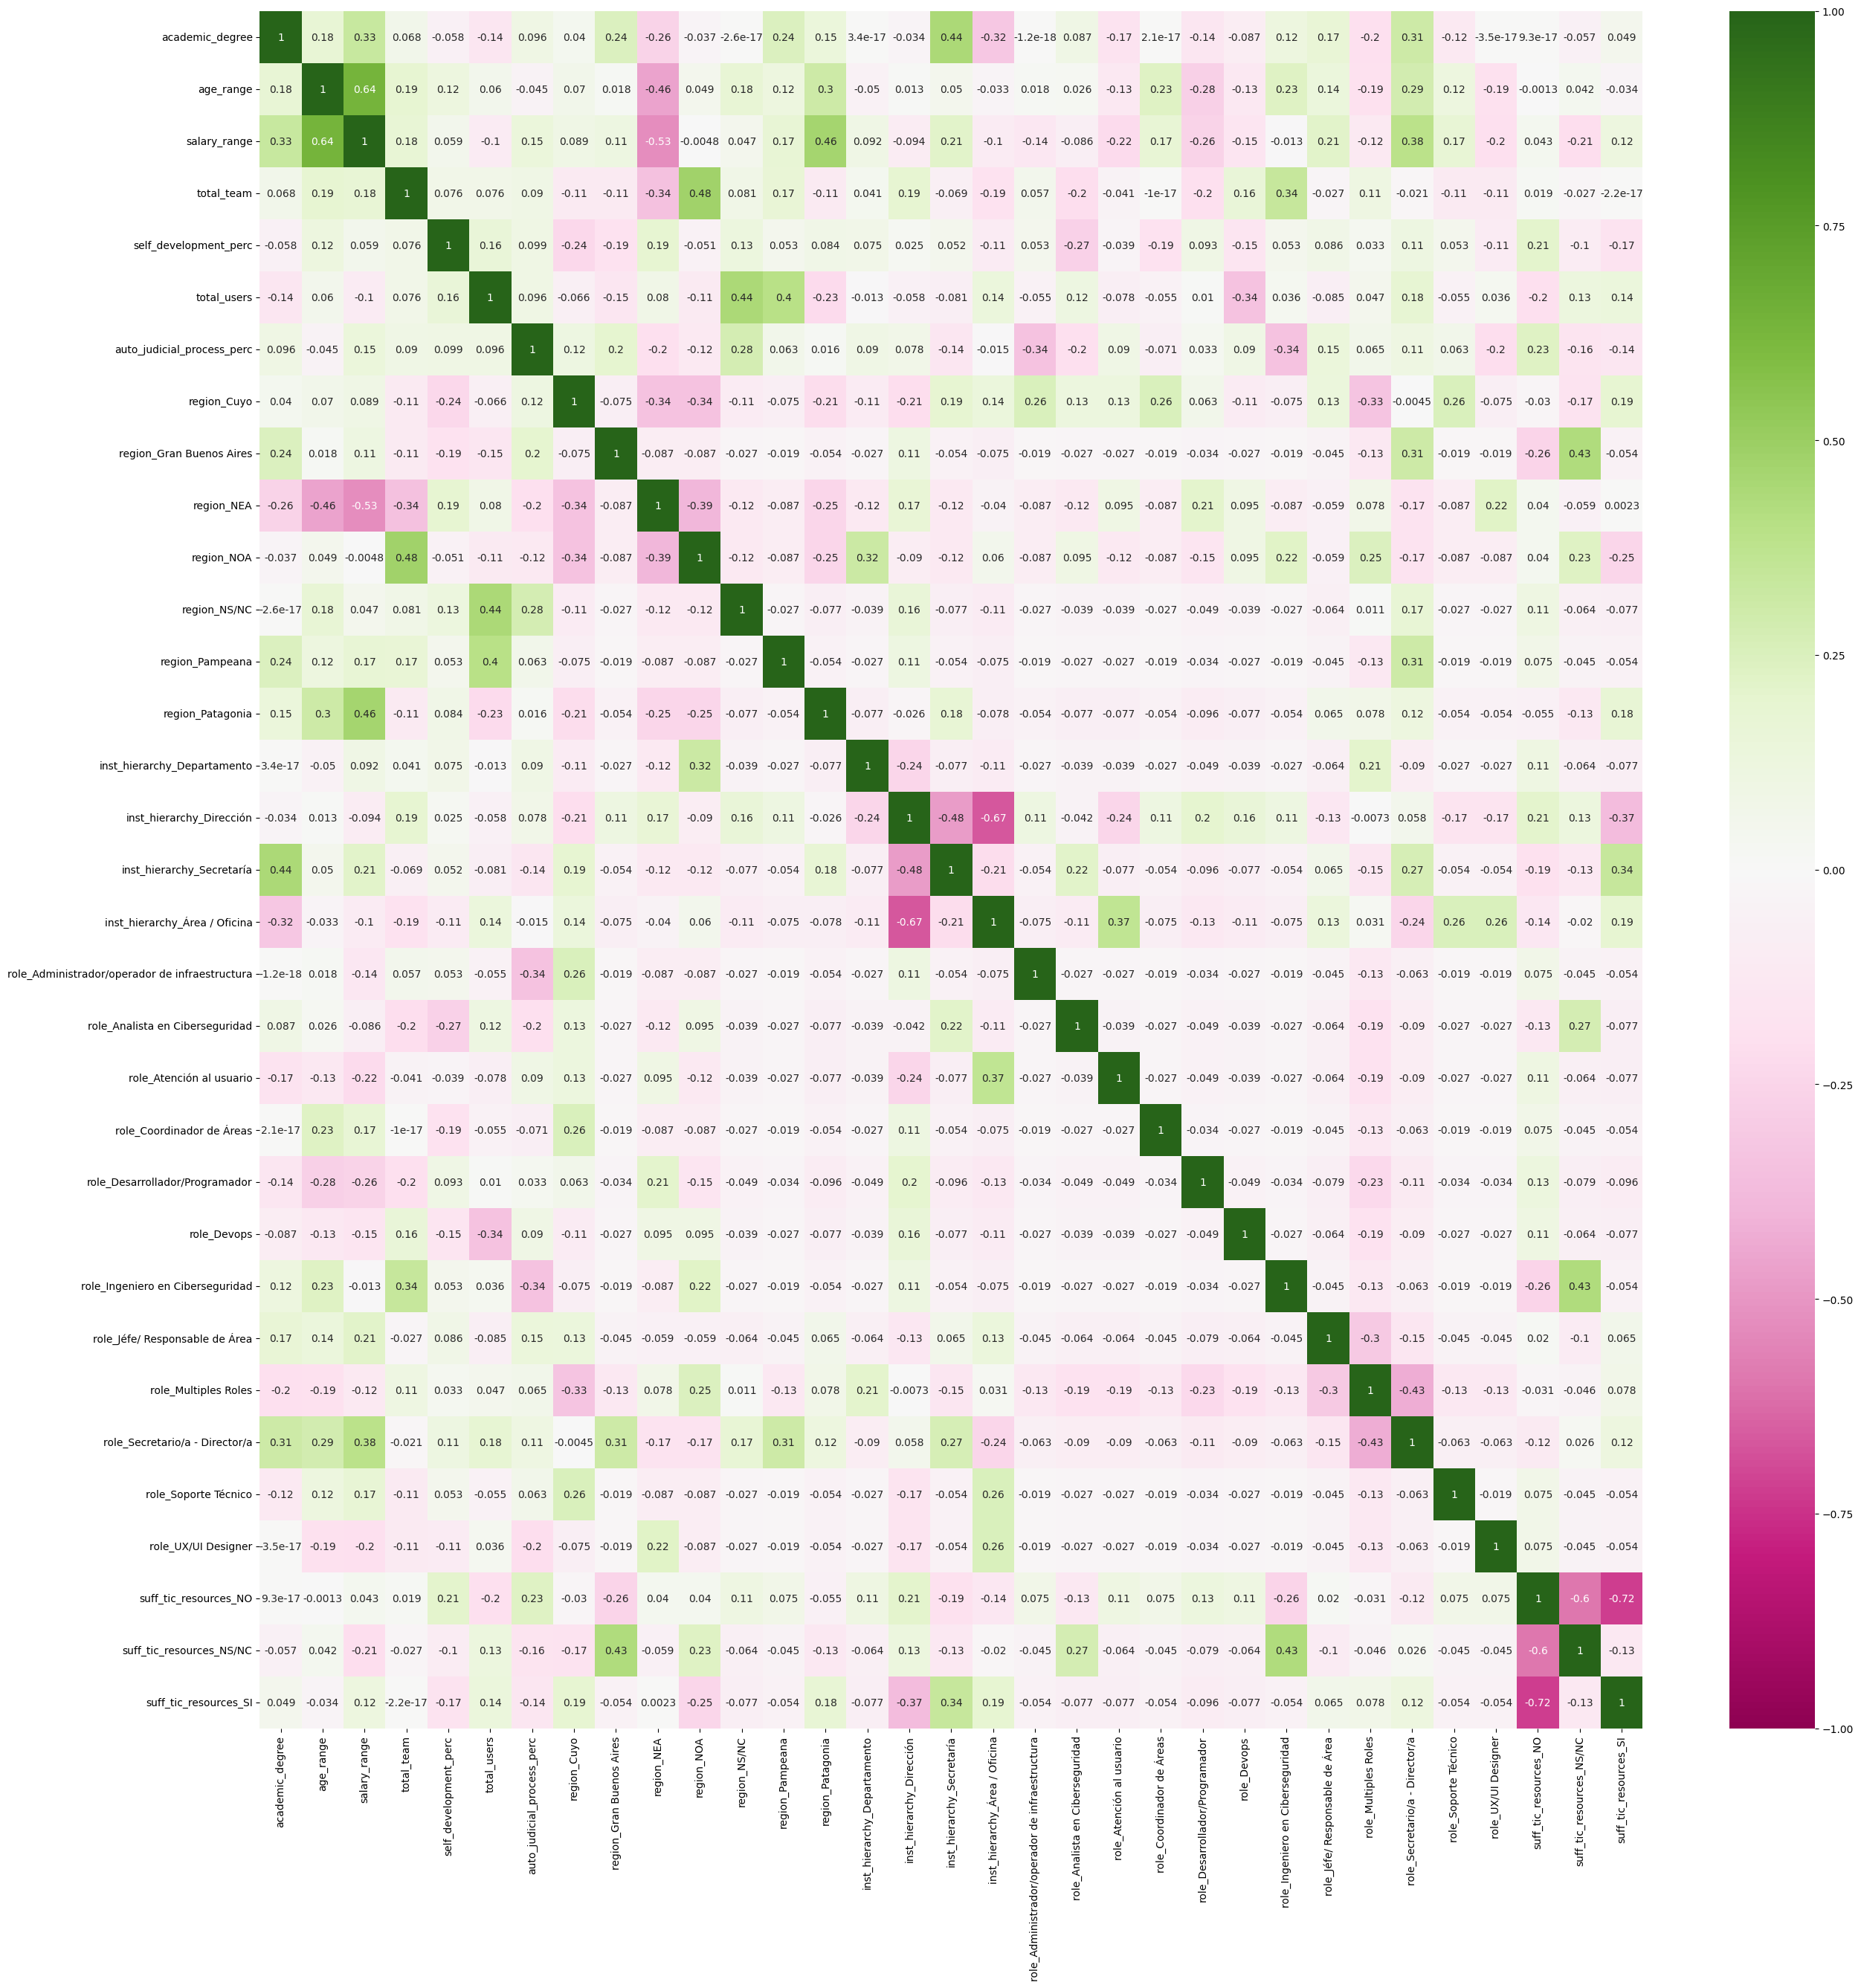

time: 5.09 s (started: 2024-05-17 16:23:31 +00:00)


In [273]:
df_encoded_corr = df_encoded.corr()

plt.figure(figsize=(30,30))

sns.heatmap(df_encoded_corr, annot=True, vmin=-1, vmax=1, cmap="PiYG") # Divergent palette
plt.show()

In [271]:
# We obtain the most important positive correlations with respect to salary_range
cor_target = abs(df_encoded_corr["salary_range"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features


academic_degree                   0.328547
age_range                         0.637066
salary_range                      1.000000
region_NEA                        0.530507
region_Patagonia                  0.461677
role_Secretario/a - Director/a    0.384010
Name: salary_range, dtype: float64

time: 26.7 ms (started: 2024-05-17 16:21:44 +00:00)


In [266]:
df_encoded_corr

,academic_degree,age_range,salary_range,total_team,self_development_perc,total_users,auto_judicial_process_perc,region_Cuyo,region_Gran Buenos Aires,region_NEA,...,role_Devops,role_Ingeniero en Ciberseguridad,role_Jéfe/ Responsable de Área,role_Multiples Roles,role_Secretario/a - Director/a,role_Soporte Técnico,role_UX/UI Designer,suff_tic_resources_NO,suff_tic_resources_NS/NC,suff_tic_resources_SI
academic_degree,1.000000e+00,0.177513,0.328547,6.843539e-02,-0.057543,-0.141186,0.096199,0.039802,0.244857,-0.258848,...,-0.087414,0.122428,0.170962,-0.200210,0.310552,-0.122428,-3.520255e-17,9.280427e-17,-0.056987,4.919892e-02
age_range,1.775130e-01,1.000000,0.637066,1.888173e-01,0.124502,0.060247,-0.044862,0.069929,0.017925,-0.460797,...,-0.125141,0.229042,0.139988,-0.194336,0.287968,0.123483,-1.931918e-01,-1.294989e-03,0.041718,-3.441591e-02
salary_range,3.285475e-01,0.637066,1.000000,1.789544e-01,0.058895,-0.101705,0.145922,0.088845,0.110839,-0.530507,...,-0.152417,-0.013488,0.214560,-0.117322,0.384010,0.173002,-1.999791e-01,4.251618e-02,-0.205006,1.244337e-01
total_team,6.843539e-02,0.188817,0.178954,1.000000e+00,0.075871,0.075810,0.089534,-0.111133,-0.113947,-0.344164,...,0.162717,0.341840,-0.026520,0.108698,-0.020646,-0.113947,-1.139466e-01,1.852211e-02,-0.026520,-2.160600e-17
self_development_perc,-5.754273e-02,0.124502,0.058895,7.587135e-02,1.000000,0.163837,0.099234,-0.235569,-0.186800,0.190648,...,-0.152737,0.052726,0.085548,0.032847,0.114092,0.052726,-1.069578e-01,2.096124e-01,-0.100274,-1.725332e-01
total_users,-1.411861e-01,0.060247,-0.101705,7.581050e-02,0.163837,1.000000,0.095842,-0.065998,-0.145005,0.080381,...,-0.336182,0.035825,-0.084966,0.046961,0.182364,-0.054590,3.582470e-02,-1.985480e-01,0.125463,1.371093e-01
auto_judicial_process_perc,9.619891e-02,-0.044862,0.145922,8.953437e-02,0.099234,0.095842,1.000000,0.115444,0.196439,-0.198536,...,0.089909,-0.337473,0.146534,0.065209,0.108601,0.062961,-2.039946e-01,2.317071e-01,-0.164119,-1.447250e-01
region_Cuyo,3.980164e-02,0.069929,0.088845,-1.111327e-01,-0.235569,-0.065998,0.115444,1.000000,-0.075023,-0.339901,...,-0.107134,-0.075023,0.133866,-0.330575,-0.004531,0.256330,-7.502345e-02,-3.048780e-02,-0.174608,1.884303e-01
region_Gran Buenos Aires,2.448566e-01,0.017925,0.110839,-1.139466e-01,-0.186800,-0.145005,0.196439,-0.075023,1.000000,-0.087127,...,-0.027462,-0.019231,-0.044757,-0.131036,0.306622,-0.019231,-1.923077e-02,-2.563301e-01,0.429669,-5.409641e-02
region_NEA,-2.588476e-01,-0.460797,-0.530507,-3.441642e-01,0.190648,0.080381,-0.198536,-0.339901,-0.087127,1.000000,...,0.095387,-0.087127,-0.059481,0.077573,-0.172595,-0.087127,2.207214e-01,3.965512e-02,-0.059481,2.334182e-03


time: 44.2 ms (started: 2024-05-17 16:14:30 +00:00)


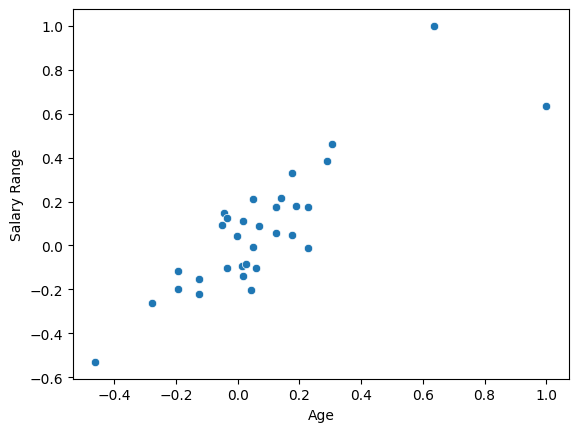

time: 405 ms (started: 2024-05-17 16:14:53 +00:00)


In [270]:
sns.scatterplot(data=df_encoded_corr, x="age_range", y="salary_range")

plt.xlabel("Age")
plt.ylabel("Salary Range")
plt.show()


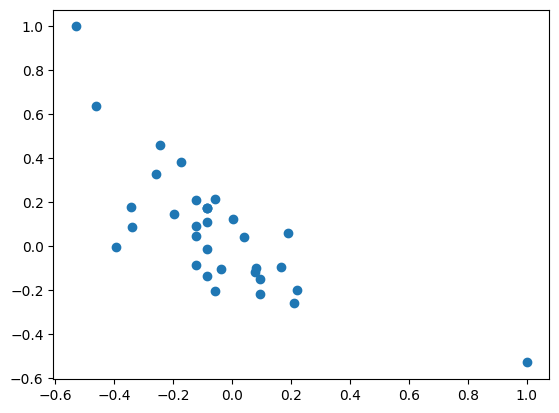

time: 465 ms (started: 2024-05-17 14:11:17 +00:00)


In [90]:
plt.scatter(df_encoded_corr["region_NEA"], df_encoded_corr["salary_range"])

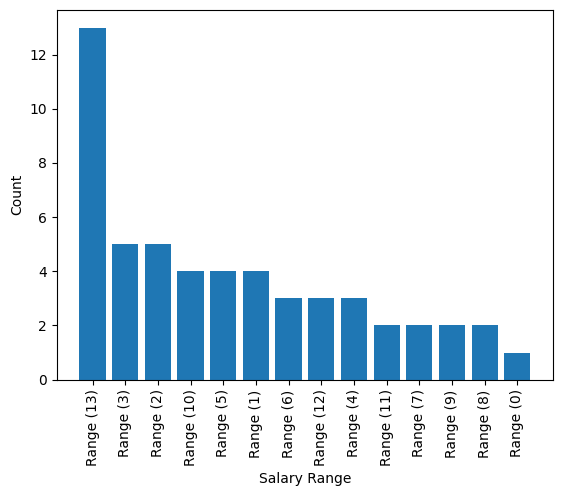

array(['Cuyo', 'Gran Buenos Aires', 'NEA', 'NOA', 'NS/NC', 'Pampeana',
       'Patagonia'], dtype=object)

time: 851 ms (started: 2024-05-17 15:52:16 +00:00)


In [186]:
# We evaluate the distribution of classes
# Gráficas de barras

labels = []
values = []

for i, v in df_encoded["salary_range"].value_counts().items():
  labels.append("Range (%d)" % i)
  values.append(v)

plt.bar(labels,
        values,
        width = 0.8)
plt.xlabel("Salary Range")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


encoder.categories_[0]